**Customer Segmentation / Clustering**

Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt

Load dataset

In [2]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

Merge dataset

In [3]:
merged_df = pd.merge(transactions, customers, on='CustomerID')


Davies-Bouldin Index: 0.7437
Silhouette Score: 0.4680


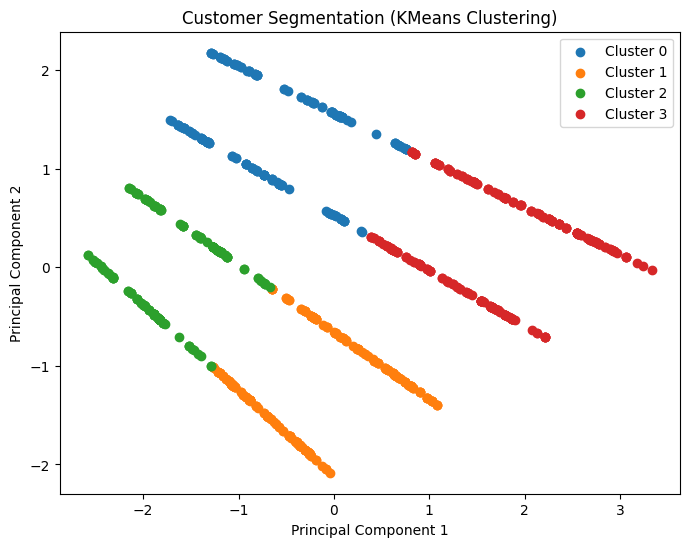

{'Number of Clusters': 4, 'DB Index': 0.743702940359571, 'Silhouette Score': 0.4680372654868254}


In [4]:
features = merged_df[['TotalValue', 'Quantity', 'Price']] 

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# clustering (KMeans)
kmeans = KMeans(n_clusters=4, random_state=42) 
merged_df['Cluster'] = kmeans.fit_predict(scaled_features)

# clustering performance
db_index = davies_bouldin_score(scaled_features, merged_df['Cluster'])
silhouette = silhouette_score(scaled_features, merged_df['Cluster'])

print(f'Davies-Bouldin Index: {db_index:.4f}')
print(f'Silhouette Score: {silhouette:.4f}')

#2D visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = merged_df['Cluster']

# Plotting
plt.figure(figsize=(8, 6))
for cluster in range(4):  
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')
    
plt.title('Customer Segmentation (KMeans Clustering)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# report
report = {
    'Number of Clusters': 4,  # Change this to your selected number of clusters
    'DB Index': db_index,
    'Silhouette Score': silhouette
}

print(report)